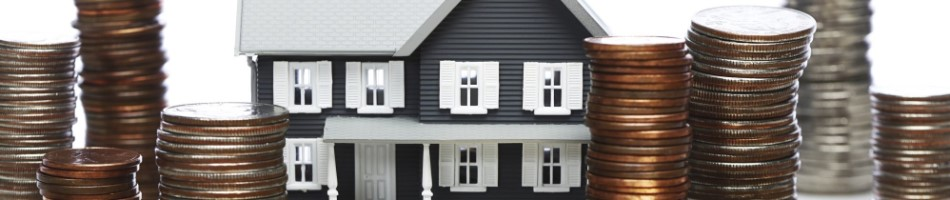

KC deki ev fiyatlarını tahmin eden bir model geliştiriyoruz.
veri seti: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [3]:
#kütüphaneleri yükle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [40]:
# Grafikleri jnb üzeridne göster
%matplotlib inline

In [22]:
pd.set_option("display.max_columns",None) #tüm sütunalrı göster

In [15]:
#Veri setini yükle

In [14]:
df=pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Bu veri seti, Seattle'ı içeren King County için ev satış fiyatlarını içermektedir. Mayıs 2014 ile Mayıs 2015 arasında satılan evleri kapsar.

Basit regresyon modellerini değerlendirmek için harika bir veri setidir.

Veri Sözlüğü:
- id: Bir ev için id no
- date: Evin satıldığı tarih
- price: Fiyat, [tahmin hedefi,y]
- bedrooms: Yatak odası sayısı
- bathrooms: Banyo sayısı/yatak odası
- sqft_living: Evdeki alanın metre karecinsinden büyüklüğü
- sqft_lot: Arsanın metre kare cinsinden büyüklüğü
- floors: Evdeki toplam kat sayısı
- waterfront: Su manzaralı ev
- view: Manzara
- condition: Genel olarak evin durumu ne kadar iyi
- grade: King County derecelendirme sistemi temelinde konut birimine verilen genel derece
- sqft_above: Bodrum hariç evin metre kare cinsinden büyüklüğü
- sqft_basement: Bodrumun  metre kare cinsinden büyüklüğü
- yr_built: Yapım yılı
- yr_renovated: Retorasyon yılı
- zipcode: Posta kodu
- lat: Enlem koordinatı
- long: Boylam koordinatı
- sqft_living15: 2015 yılında oturma odası alanı (bazı yenilemeleri ima eder). Bu, arsa büyüklüğü alanını etkilemiş olabilir veya olmayabilir.
- sqft_lot15: 2015 yılında arsa büyüklüğü (bazı yenilemeleri ima eder).

In [16]:
# EDA Automatik olarak yapılır

In [17]:
!pip install ydata_profiling

Defaulting to user installation because normal site-packages is not writeable


In [19]:
import ydata_profiling

In [20]:
#Keşifsel veri analiz raporu
profile=ydata_profiling.ProfileReport(df)
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
# EDA ve Veri Ön işleme Data Preprocessing

In [23]:
df[df['price']==df['price'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


https://www.google.com/maps/search/47.6298%09-122.323?sa=X&ved=1t:242&ictx=111

In [25]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##  Outlier Kontrolü (Aykırı değerler)

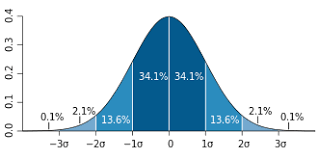

Normal dağılımda 3Sd +- verilerin %99.6 sını kapsar.
Geriye kalan % .4 ü aykırı değerlerdir.

In [41]:
#Grafik ile Aykırı değerleri gösterme

<Axes: ylabel='bathrooms'>

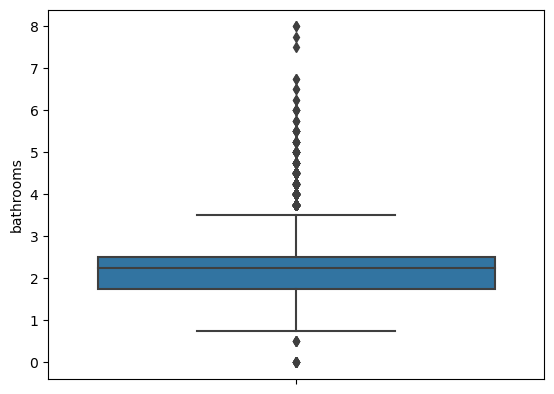

In [39]:
%matplotlib inline
sns.boxplot(y=df['bathrooms'], data=df)

<Axes: xlabel='price'>

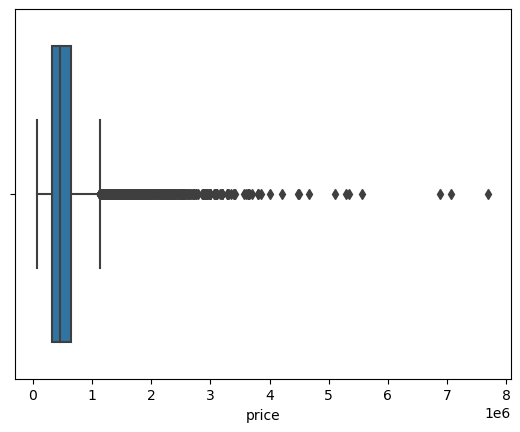

In [42]:
sns.boxplot(x=df['price'], data=df)

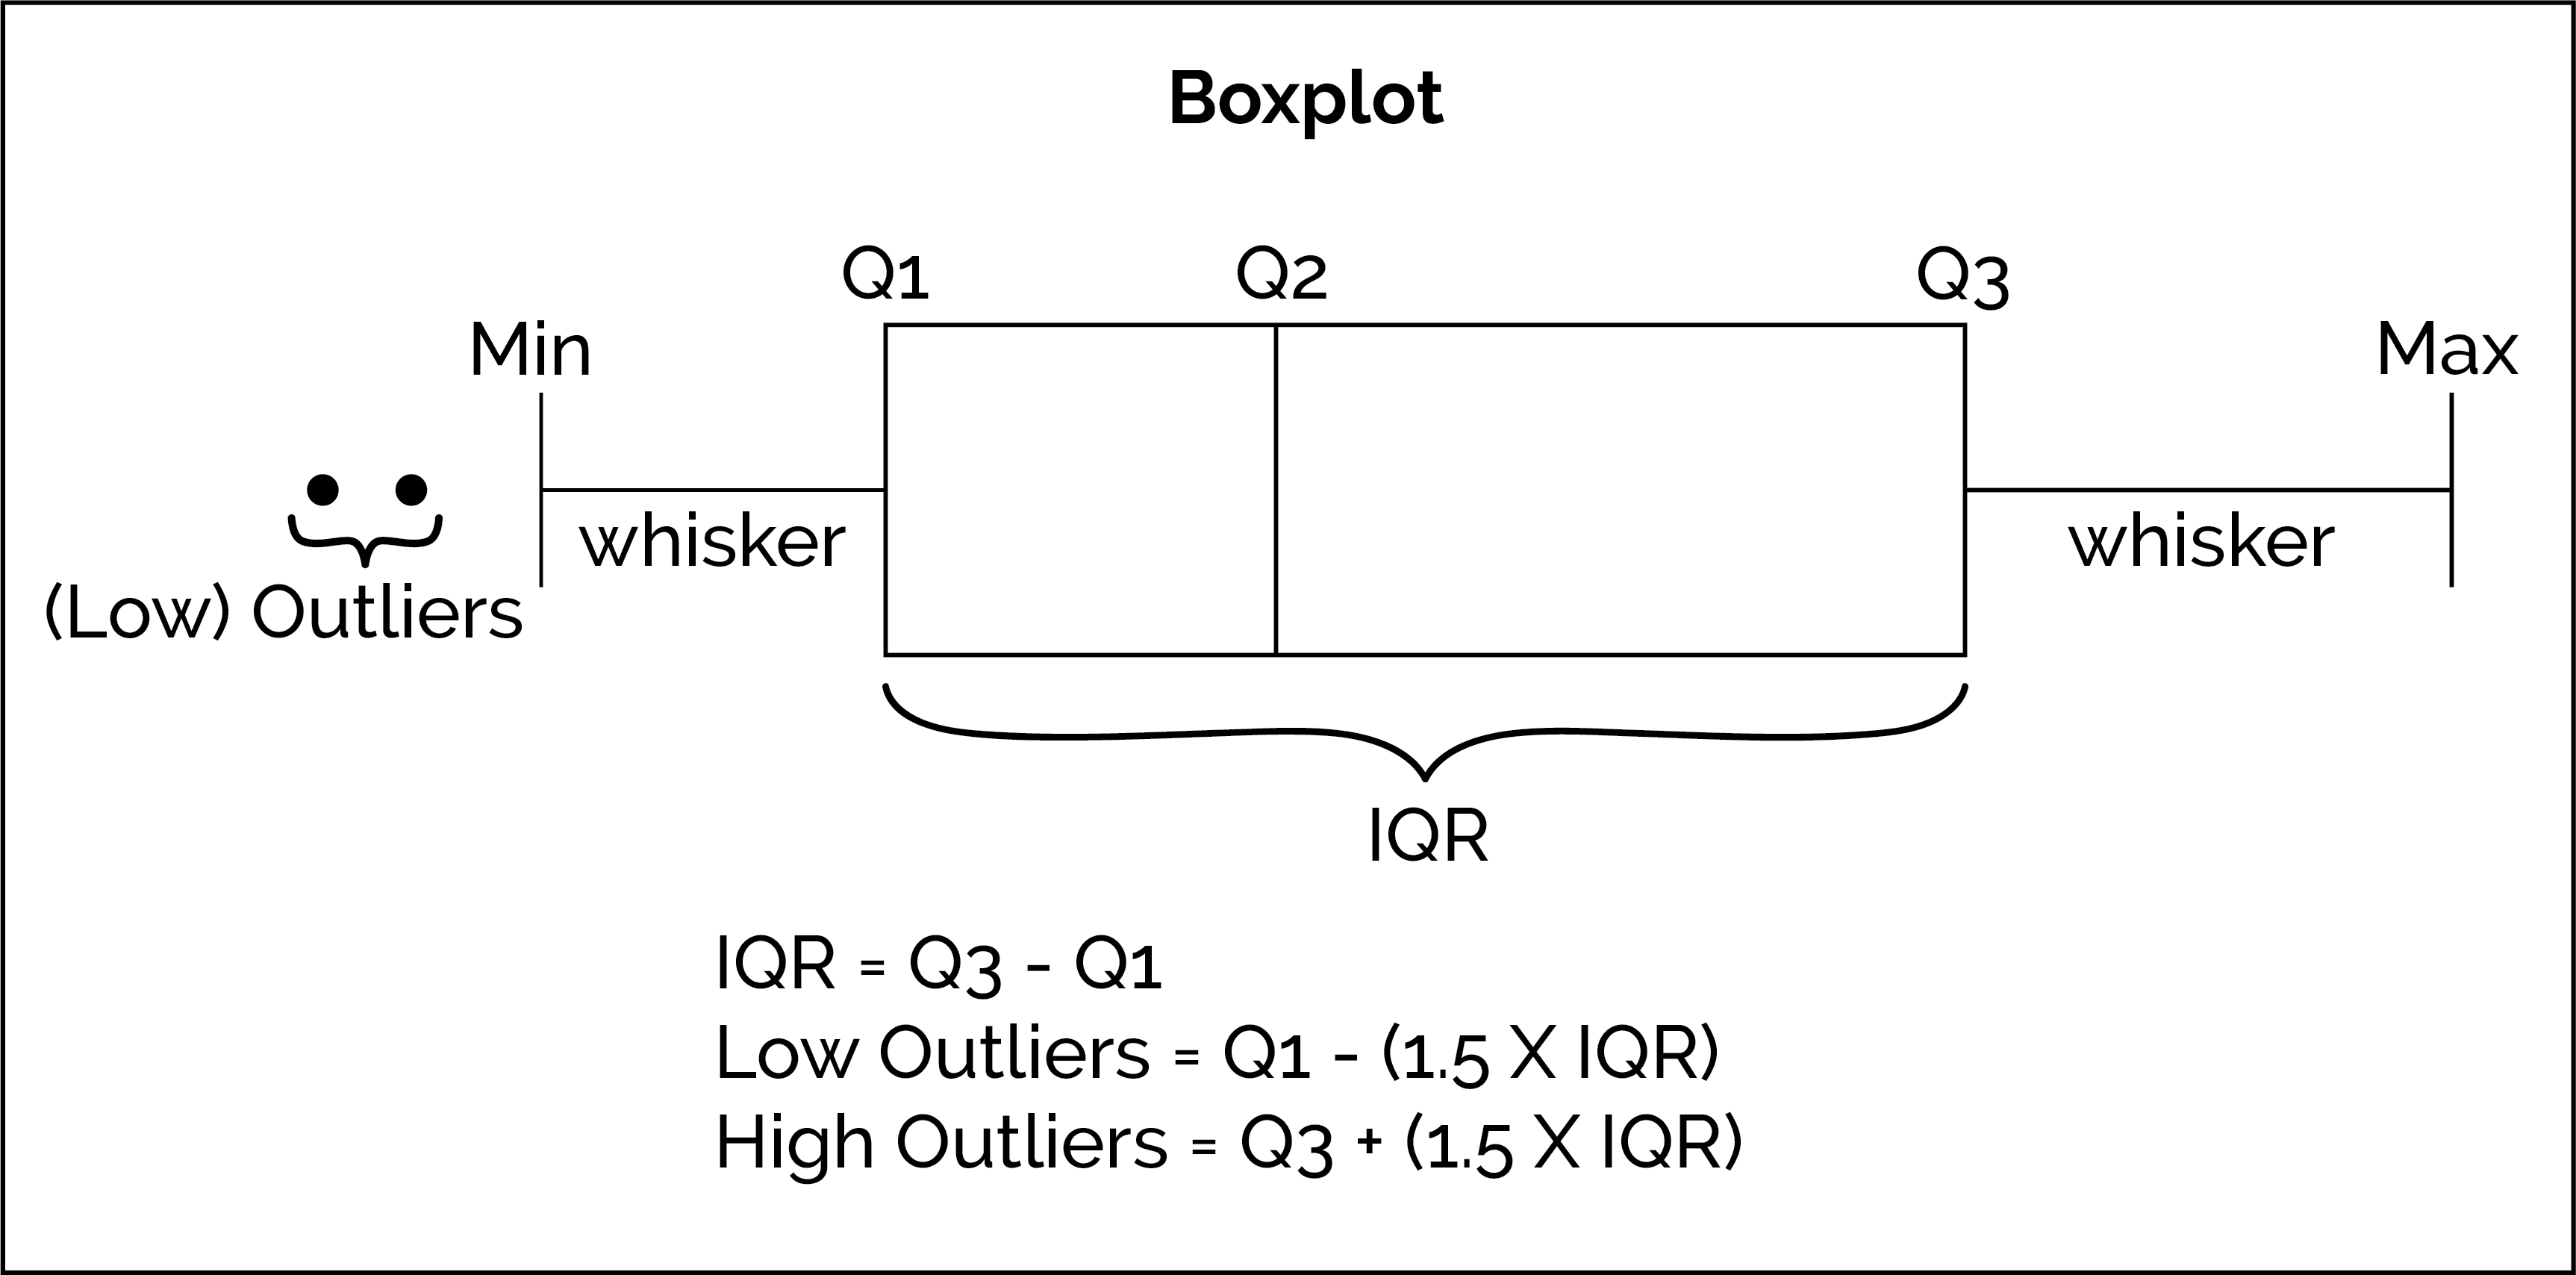

# Outliers için 1. yöntem
df_bedrooms_outliers_min=df2[df2['bedrooms']<df2['bedrooms'].mean()-3*df2['bedrooms'].std()]

In [45]:
#2. Yöntem
df_kor=df[['price','bedrooms','bathrooms','sqft_living','sqft_lot']] # Aykırı değer olan sütunların tespiti
outliers=df_kor.quantile(q=.99)
outliers

price          1964400.00
bedrooms             6.00
bathrooms            4.25
sqft_living       4978.80
sqft_lot        213008.00
Name: 0.99, dtype: float64

In [52]:
df_non_outliers=df[df['price']<outliers['price']]

In [53]:
df_non_outliers=df_non_outliers[df_non_outliers['bedrooms']<outliers['bedrooms']]

In [54]:
df_non_outliers=df_non_outliers[df_non_outliers['sqft_living']<outliers['sqft_living']]

In [55]:
df_non_outliers=df_non_outliers[df_non_outliers['sqft_lot']<outliers['sqft_lot']]

In [56]:
df_non_outliers.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.077400e+04,2.077400e+04,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000
mean,4.617201e+09,5.099878e+05,3.311254,2.070545,2008.980841,11713.006691,1.486040,0.005247,0.204968,3.409935,7.601232,1735.473910,273.506932,1970.880235,80.795658,98078.548185,47.559825,-122.215633,1955.816213,11031.837922
std,2.876712e+09,2.753241e+05,0.827587,0.718490,802.631011,18817.739040,0.539422,0.072247,0.709782,0.650089,1.109744,750.747988,413.987609,29.334521,393.369803,53.576531,0.138872,0.140006,651.499251,19116.131084
min,1.200019e+06,7.500000e+04,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,399.000000,651.000000
25%,2.141500e+09,3.190000e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.469725,-122.330000,1480.000000,5060.000000
50%,3.959401e+09,4.450000e+05,3.000000,2.250000,1880.000000,7500.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1974.000000,0.000000,98065.000000,47.570900,-122.234000,1820.000000,7551.000000
75%,7.345528e+09,6.250000e+05,4.000000,2.500000,2480.000000,10305.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,530.000000,1996.000000,0.000000,98118.000000,47.678800,-122.127000,2320.000000,9900.000000
max,9.900000e+09,1.960000e+06,5.000000,5.250000,4970.000000,212639.000000,3.500000,1.000000,4.000000,5.000000,13.000000,4930.000000,2350.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,434728.000000


<Axes: xlabel='price', ylabel='Count'>

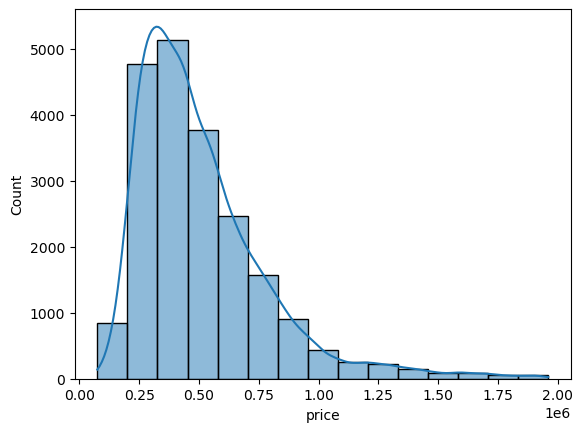

In [57]:
sns.histplot(df_non_outliers['price'], bins=15, kde=True)

In [58]:
df_non_outliers['zipcode'].dtype

dtype('int64')

In [59]:
df_non_outliers['zipcode']=df_non_outliers['zipcode'].astype('category')

In [60]:
df_non_outliers['zipcode'].dtype

CategoricalDtype(categories=[98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008,
                  98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027,
                  98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038,
                  98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056,
                  98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077,
                  98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109,
                  98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125,
                  98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166,
                  98168, 98177, 98178, 98188, 98198, 98199],
, ordered=False)

In [61]:
df_non_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20774 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             20774 non-null  int64   
 1   date           20774 non-null  object  
 2   price          20774 non-null  float64 
 3   bedrooms       20774 non-null  int64   
 4   bathrooms      20774 non-null  float64 
 5   sqft_living    20774 non-null  int64   
 6   sqft_lot       20774 non-null  int64   
 7   floors         20774 non-null  float64 
 8   waterfront     20774 non-null  int64   
 9   view           20774 non-null  int64   
 10  condition      20774 non-null  int64   
 11  grade          20774 non-null  int64   
 12  sqft_above     20774 non-null  int64   
 13  sqft_basement  20774 non-null  int64   
 14  yr_built       20774 non-null  int64   
 15  yr_renovated   20774 non-null  int64   
 16  zipcode        20774 non-null  category
 17  lat            20774 non-null  float

<Axes: >

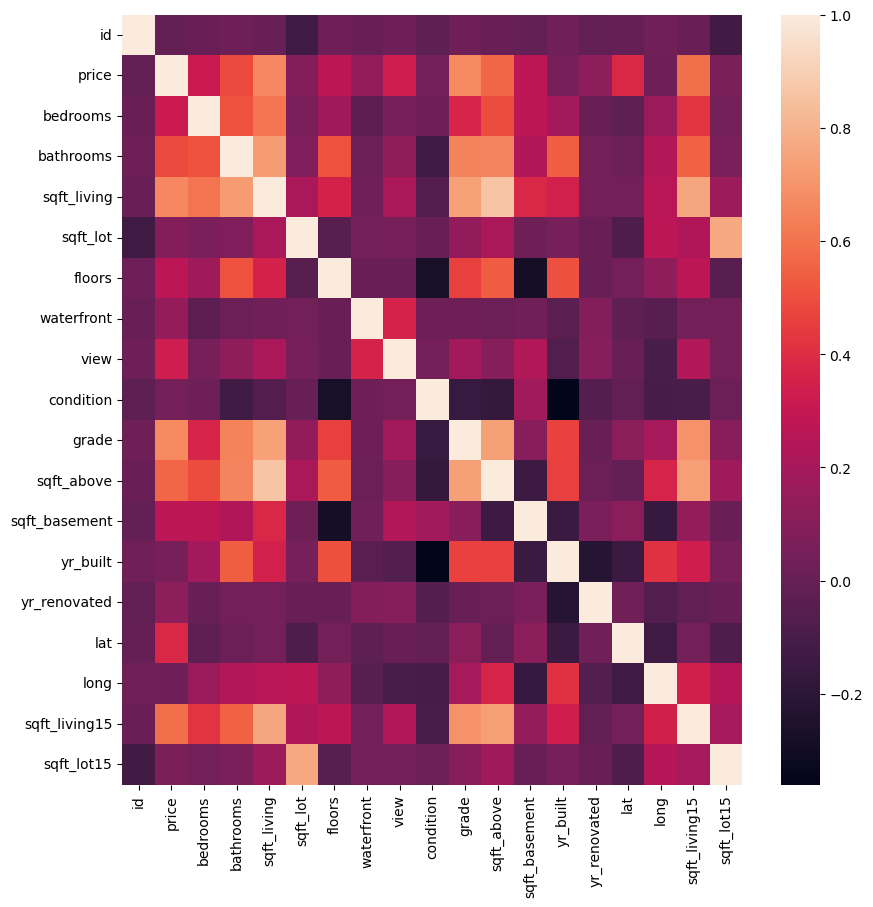

In [66]:
plt.figure(figsize=(10,10))
sns.heatmap(df_non_outliers.corr(numeric_only=True))

In [71]:
# Price ile korelasyon sıralaması pozitif olanalrı alır dikkat edin
df_cor=df_non_outliers.corr(numeric_only=True).sort_values('price', ascending=False)['price'].head(10)

In [72]:
df_cor

price            1.000000
grade            0.665925
sqft_living      0.661235
sqft_living15    0.588437
sqft_above       0.559291
bathrooms        0.487293
lat              0.378875
view             0.335769
bedrooms         0.315142
floors           0.269345
Name: price, dtype: float64

In [74]:
df_cor[df_cor>.5]

price            1.000000
grade            0.665925
sqft_living      0.661235
sqft_living15    0.588437
sqft_above       0.559291
Name: price, dtype: float64

#Emlak sektöründeki bilgileri kullanıyoruz
#ÖZellik dönüşümü
#Yatak odası ev fiyatı üzerdne çok etkili

In [76]:
df_non_outliers['bedrooms']=df_non_outliers['bedrooms']**2
df_non_outliers['bathrooms']=df_non_outliers['bathrooms']**2
df_non_outliers['sqft_living']=df_non_outliers.sqft_living**2

In [78]:
df['yr_built']

0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21608    2009
21609    2014
21610    2009
21611    2004
21612    2008
Name: yr_built, Length: 21613, dtype: int64

In [79]:
df_non_outliers['age']=2015-df_non_outliers['yr_built']

In [80]:
df_non_outliers

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,20141013T000000,221900.0,81,1.000000,1392400,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,60
1,6414100192,20141209T000000,538000.0,81,25.628906,6604900,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,64
2,5631500400,20150225T000000,180000.0,16,1.000000,592900,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,20141209T000000,604000.0,256,81.000000,3841600,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,50
4,1954400510,20150218T000000,510000.0,81,16.000000,2822400,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,81,39.062500,2340900,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,6
21609,6600060120,20150223T000000,400000.0,256,39.062500,5336100,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,1
21610,1523300141,20140623T000000,402101.0,16,0.316406,1040400,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,6
21611,291310100,20150116T000000,400000.0,81,39.062500,2560000,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,11


In [81]:
df_non_outliers['age'].max()

115

In [84]:
df_non_outliers[df_non_outliers['age']==115].iloc[0]

id                    1175000570
date             20150312T000000
price                   530000.0
bedrooms                     625
bathrooms                   16.0
sqft_living              3276100
sqft_lot                    4850
floors                       1.5
waterfront                     0
view                           0
condition                      3
grade                          7
sqft_above                  1810
sqft_basement                  0
yr_built                    1900
yr_renovated                   0
zipcode                    98107
lat                        47.67
long                    -122.394
sqft_living15               1360
sqft_lot15                  4850
age                          115
Name: 14, dtype: object

In [85]:
df_non_outliers['yr_renovated'].describe()

count    20774.000000
mean        80.795658
std        393.369803
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [86]:
#restoreasyon yapılıp yapılmadığı bilgisi
df_non_outliers['yr_renovated']=np.where(df_non_outliers['yr_renovated']==0,0,1) # restorasyon yılı değeri 0 sa sıfır olsun ama sıfır değilse 1 yap

In [87]:
df_non_outliers['renovated']=df_non_outliers['yr_renovated']
df_non_outliers.drop('yr_renovated',axis=1,inplace=True)

In [88]:
df_non_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20774 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             20774 non-null  int64   
 1   date           20774 non-null  object  
 2   price          20774 non-null  float64 
 3   bedrooms       20774 non-null  int64   
 4   bathrooms      20774 non-null  float64 
 5   sqft_living    20774 non-null  int64   
 6   sqft_lot       20774 non-null  int64   
 7   floors         20774 non-null  float64 
 8   waterfront     20774 non-null  int64   
 9   view           20774 non-null  int64   
 10  condition      20774 non-null  int64   
 11  grade          20774 non-null  int64   
 12  sqft_above     20774 non-null  int64   
 13  sqft_basement  20774 non-null  int64   
 14  yr_built       20774 non-null  int64   
 15  zipcode        20774 non-null  category
 16  lat            20774 non-null  float64 
 17  long           20774 non-null  float

In [90]:
#Bodrum mvar yok
df_non_outliers['sqft_basement']=np.where(df_non_outliers['sqft_basement']==0,0,1)

In [91]:
df_non_outliers['sqft_basement']

0        0
1        1
2        0
3        1
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: sqft_basement, Length: 20774, dtype: int32

In [93]:
# Özellikleri ve hedefi belirleyelim
X=df_non_outliers.drop(['price','date','id','lat','long'],axis=1)
y=df_non_outliers['price']

In [94]:
df_non_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20774 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             20774 non-null  int64   
 1   date           20774 non-null  object  
 2   price          20774 non-null  float64 
 3   bedrooms       20774 non-null  int64   
 4   bathrooms      20774 non-null  float64 
 5   sqft_living    20774 non-null  int64   
 6   sqft_lot       20774 non-null  int64   
 7   floors         20774 non-null  float64 
 8   waterfront     20774 non-null  int64   
 9   view           20774 non-null  int64   
 10  condition      20774 non-null  int64   
 11  grade          20774 non-null  int64   
 12  sqft_above     20774 non-null  int64   
 13  sqft_basement  20774 non-null  int32   
 14  yr_built       20774 non-null  int64   
 15  zipcode        20774 non-null  category
 16  lat            20774 non-null  float64 
 17  long           20774 non-null  float

In [95]:
#Kategorik verileri sayısal verilere dönüştürelim
X=pd.get_dummies(X, columns=['zipcode'],drop_first=True)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,age,renovated,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,81,1.000000,1392400,5650,1.0,0,0,3,7,1180,0,1955,1340,5650,60,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,81,25.628906,6604900,7242,2.0,0,0,3,7,2170,1,1951,1690,7639,64,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,16,1.000000,592900,10000,1.0,0,0,3,6,770,0,1933,2720,8062,82,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,256,81.000000,3841600,5000,1.0,0,0,5,7,1050,1,1965,1360,5000,50,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,81,16.000000,2822400,8080,1.0,0,0,3,8,1680,0,1987,1800,7503,28,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,81,39.062500,2340900,1131,3.0,0,0,3,8,1530,0,2009,1530,1509,6,0,False,False,False,False,False,False,False,False,False,False,False,Fal

In [96]:
#Standard Scaler Ölçeklendirme

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler=StandardScaler()

In [100]:
X_scaler=scaler.fit_transform(X)

In [101]:
#Veri setini eğiitm ve test olarak ayırma
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaler,y,test_size=0.2,random_state=42)

In [102]:
#Modelleme
from all_reg_models import all_reg_models

#bu modülü import ettiniz yüklü olmayana kütüphanelkeri yükleyin 
#hata verirse Örnek
!pip install xgboost

In [104]:
all_reg_models(X_train,X_test,y_train,y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1784
[LightGBM] [Info] Number of data points in the train set: 16619, number of used features: 85
[LightGBM] [Info] Start training from score 510645.277454
Linear Regression: Average RMSE: 112281.03
Linear Regression: R2: 0.83
Decision Tree: Average RMSE: 162272.89
Decision Tree: R2: 0.65
Random Forest: Average RMSE: 118137.84
Random Forest: R2: 0.81
Gradient Boosting: Average RMSE: 128565.88
Gradient Boosting: R2: 0.78
XGBoost: Average RMSE: 105697.58
XGBoost: R2: 0.85
LightGBM: Average RMSE: 104442.25
LightGBM: R2: 0.85
Ridge: Average RMSE: 112284.36
Ridge: R2: 0.83
Lasso: Average RMSE: 112284.75
Lasso: R2: 0.83
ElasticNet: Average RMSE: 125712.43
ElasticNet: R2: 0.79
KNeighborsRegressor: Average RMSE: 114607.53
KNeighborsRegressor: 

In [108]:
from lightgbm import LGBMRegressor
lgbm_model=LGBMRegressor()

In [110]:
from sklearn.metrics import r2_score, mean_squared_error
lgbm_model.fit(X_train,y_train)
y_pred=lgbm_model.predict(X_test)
r2=r2_score(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred)**.5
print('Model in R2 Score:',r2,
      '\nModel in RMSE Score:',rmse)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1784
[LightGBM] [Info] Number of data points in the train set: 16619, number of used features: 85
[LightGBM] [Info] Start training from score 510645.277454
Model in R2 Score: 0.8533643989771101 
Model in RMSE Score: 104442.25299579177


In [111]:
# Katsayılar ve özellik değerleri
columns=X.columns
df_importance=pd.DataFrame({'Feature':columns,'Importance':lgbm_model.feature_importances_})

In [113]:
df_importance.sort_values(by='Importance',ascending=False).head(10)

,Feature,Importance
11,yr_built,280
2,sqft_living,206
12,sqft_living15,193
13,sqft_lot15,161
3,sqft_lot,160
8,grade,155
9,sqft_above,119
18,zipcode_98004,84
6,view,84
40,zipcode_98040,63
